In [1]:
%load_ext autoreload
%autoreload 2

## import general packages
import numpy as np
from matplotlib import pyplot as plt, gridspec as gs
import ipywidgets as widgets
#%matplotlib nbagg


import os, sys

## add root directory to path, to allow for imports 
root_dir = os.path.dirname(os.path.abspath(os.getcwd()))
if not root_dir in sys.path: sys.path.append(root_dir)


## import darkMatter specific packages
from darkMatter import darkMatter
from utils.plots import *
from utils.parameters import create_population_values, set_options, get_J, get_var_V

from empirical.model import *

In [2]:
## setting simulation parameters
steps=200
save=False
file_format='png'
rerun=False
compile=False

#tau_I = [0.005,0.02,0.06]
#tau_I = [0.005]

In [4]:
tau_G, tau_A, tau_N = [0.03,0.005,0.2]
options_changes = {'mode_stats': 1, 'tau_I': [tau_G,tau_A,tau_N], 'alpha_0':0.01, 'tau_n': 0., 'eta': 0.9, 'eps': np.sqrt(1./2)}

In [5]:
res['sigma_V'].shape

NameError: name 'res' is not defined

Figure saved as "../figures/mixed_timeconstants.png"


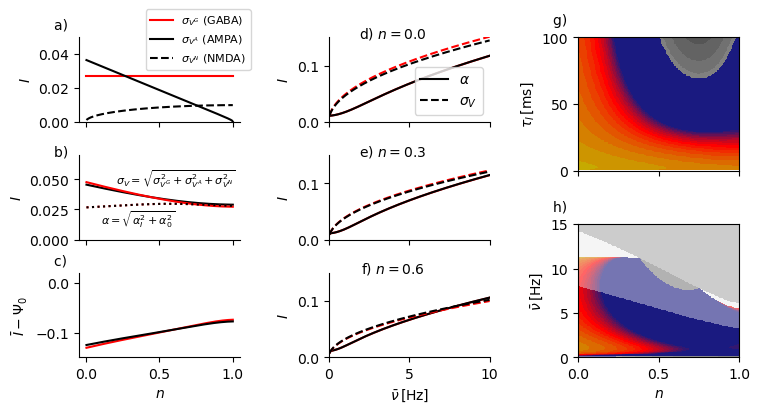

In [11]:

fig = plt.figure(figsize=(7.5,4))

grid_opts = {'bottom':0.12,'top':0.92,'left':0.1,'right':0.98,'wspace':0.55,'hspace':0.4}

cols = 3
gs2 = plt.GridSpec(2, cols, figure=fig,**grid_opts)
gs3 = plt.GridSpec(3, cols, figure=fig,**grid_opts)


ax_timeconstants = fig.add_subplot(gs3[0,0])
ax_vars = fig.add_subplot(gs3[1,0])
ax_currents = fig.add_subplot(gs3[2,0])

ax_trans_1 = fig.add_subplot(gs3[0,1])
ax_trans_2 = fig.add_subplot(gs3[1,1])
ax_trans_3 = fig.add_subplot(gs3[2,1])

ax_param_space_1 = fig.add_subplot(gs2[0,2])
ax_param_space_2 = fig.add_subplot(gs2[1,2])

axes = [ax_timeconstants, ax_vars, ax_currents, ax_trans_1, ax_trans_2, ax_trans_3]
axes_param_space = [ax_param_space_1, ax_param_space_2] 


options = set_options(L=1,nI=1,nE=1)
options['simulation'] = {
    'tau_n': [0.,1.],
    'alpha_0': [0.02],
    'sim_prim': [0,1,0],
    'sim_sec': [0,-1,0]
}
options |= options_changes
order = [o for o in list(options['simulation']) if not o.startswith('sim')]

res = darkMatter(steps=steps,options=options,rerun=rerun,compile=compile,logging=3)


J_EE = get_J(options['eta'],options['eps'],options['tau_M'],'E','E')
J_EI = get_J(options['eta'],options['eps'],options['tau_M'],'I','E')
J_IE = get_J(options['eta'],options['eps'],options['tau_M'],'E','I')
J_II = get_J(options['eta'],options['eps'],options['tau_M'],'I','I')

var_E_V_A,var_E_V_N,var_E_V_G = get_var_V(J_EE,J_EI,options['rateWnt'],tau_A,tau_N,tau_G,options['tau_M'],res['tau_n'])
var_I_V_A,var_I_V_N,var_I_V_G = get_var_V(J_IE,J_II,options['rateWnt'],tau_A,tau_N,tau_G,options['tau_M'],res['tau_n'])


## plot contributions of different synapses
ax_timeconstants.plot(res[order[0]],np.sqrt(var_E_V_G),'r-',label=r'$\sigma_{V^G}$ (GABA)')
ax_timeconstants.plot(res[order[0]],np.sqrt(var_E_V_A),'k-',label=r'$\sigma_{V^A}$ (AMPA)')
# if options['tau_n'] > 0:
ax_timeconstants.plot(res[order[0]],np.sqrt(var_E_V_N),'k--',label=r'$ \sigma_{V^N}$ (NMDA)')
ax_timeconstants.legend(prop={'size':8},bbox_to_anchor=(1.1,1.4),loc='upper right',ncol=1)
plt.setp(ax_timeconstants,ylim=[0,0.05],ylabel='$I$')

var_V_E = np.sqrt(var_E_V_G + var_E_V_A + var_E_V_N)
var_V_I = np.sqrt(var_I_V_G + var_I_V_A + var_I_V_N)

ax_vars.plot(res[order[0]],var_V_E,'k-')
ax_vars.plot(res[order[0]],var_V_I,'r-')

ax_vars.plot(res[order[0]],res['alpha'][0,0,:],'r:')
ax_vars.plot(res[order[0]],res['alpha'][1,0,:],'k:')

idx = int(steps/5)
ax_vars.text(res[order[0]][idx],var_V_E[idx]+0.005,'$\sigma_V = \sqrt{\\sigma_{V^G}^2 + \\sigma_{V^A}^2 + \\sigma_{V^N}^2}$',fontsize=8)

idx = int(steps/10)
ax_vars.text(res[order[0]][idx],res['alpha'][1,0,idx]-0.015,'$\\alpha = \sqrt{\\alpha_I^2 + \\alpha_0^2}$',fontsize=8)

plt.setp(ax_vars,ylim=[0,0.07],ylabel='$I$')

ax_currents.plot(res[order[0]],-res['I_balance'][0,0,:],'r-')
ax_currents.plot(res[order[0]],-res['I_balance'][1,0,:],'k-')
plt.setp(ax_currents,ylim=[-0.15,0.02],ylabel='$\\bar{I} - \Psi_0$', xlabel=get_displayString(order[0]))

# ----------------------------------------------------------------

options = set_options(L=1,nI=1,nE=1)
options['simulation'] = {
    'rateWnt': [0,10],
    'tau_n': [0.,0.3,0.6],
    'sim_prim': [0,-1,0],
    'sim_sec': [0,1,0]
}
options |= options_changes
order = [o for o in list(options['simulation']) if not o.startswith('sim')]

res = darkMatter(steps=steps,options=options,rerun=rerun,compile=compile,logging=3)


for i,ax_trans in enumerate([ax_trans_1,ax_trans_2,ax_trans_3]):
    ax_trans.plot(res[order[0]],res['alpha'][0,i,:],'r-')
    ax_trans.plot(res[order[0]],res['alpha'][1,i,:],'k-',label=r'$\alpha$')

    ax_trans.plot(res[order[0]],res['sigma_V'][0,i,:],'r--')
    ax_trans.plot(res[order[0]],res['sigma_V'][1,i,:],'k--',label=r'$\sigma_V$')

    set_title(ax_trans,order=i+4,title=f"$n =${res['tau_n'][i]}",fontsize=10,offset=(0.4,1.0))
    plt.setp(ax_trans,xlim=[0,res[order[0]][-1]],ylim=[0,0.15],yticks=np.linspace(0,0.1,2),ylabel='$I$')

plt.setp(ax_trans_3,xlabel=get_displayString('rateWnt'))
ax_trans_1.legend()

for ax in axes:
    ax.spines[['top','right']].set_visible(False)

for ax in [ax_timeconstants, ax_vars, ax_trans_1, ax_trans_2]:
    plt.setp(ax,xticklabels=[])



options_changes['alpha_0'] = 0.01
options = set_options(L=1,nI=1,nE=1)
options['simulation'] = {
    'tau_n': [0.,1.],
    'tau_I': [0,0.1],
    'sim_prim': [0,1,0],
    'sim_sec': [0,0,0]
}
options |= options_changes
order = [o for o in list(options['simulation']) if not o.startswith('sim')]

res = darkMatter(steps=steps,options=options,rerun=rerun,compile=compile,logging=3)

p=1
pchi,pgamma = plot_fins(ax_param_space_1,res[order[0]],res[order[1]],
        res['gamma'][p,...],res['chi'][p,...],res['regions'][p,...],implausible=res['implausible'][p,...])
plt.setp(ax_param_space_1,ylabel=get_displayString(order[1]),xticklabels=[],yticks=np.linspace(0,0.1,3),yticklabels=np.linspace(0,100,3).astype('int'))


options = set_options(L=1,nI=1,nE=1)
options['simulation'] = {
    'tau_n': [0.,1.],
    'rateWnt': [0,15],
    'sim_prim': [0,1,0],
    'sim_sec': [0,-1,0]
}
options |= options_changes
order = [o for o in list(options['simulation']) if not o.startswith('sim')]

res = darkMatter(steps=steps,options=options,rerun=rerun,compile=compile,logging=3)

p=1
pchi,pgamma = plot_fins(ax_param_space_2,res[order[0]],res[order[1]],
        res['gamma'][p,...],res['chi'][p,...],res['regions'][p,...],implausible=res['implausible'][p,...])
plt.setp(ax_param_space_2,ylabel=get_displayString(order[1]),xlabel=get_displayString(order[0]))

set_title(ax_timeconstants,order=1,offset=[-0.1,1.1])
set_title(ax_vars,order=2,offset=[-0.1,1,2])
set_title(ax_currents,order=3,offset=[-0.1,1.1])

set_title(ax_param_space_1,order=7,offset=(-0.1,1.1))
set_title(ax_param_space_2,order=8,offset=(-0.1,1.1))

save = True
if save:
    file_format = 'png'
    sv_name = f'../figures/mixed_timeconstants.{file_format}'
    plt.savefig(sv_name)
    print('Figure saved as "%s"' % sv_name)
else:
    plt.show(block=False)

In [111]:
res['tau_n']

masked_array(data=[0.   , 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
                   0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 ,
                   0.085, 0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 ,
                   0.125, 0.13 , 0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 ,
                   0.165, 0.17 , 0.175, 0.18 , 0.185, 0.19 , 0.195, 0.2  ,
                   0.205, 0.21 , 0.215, 0.22 , 0.225, 0.23 , 0.235, 0.24 ,
                   0.245, 0.25 , 0.255, 0.26 , 0.265, 0.27 , 0.275, 0.28 ,
                   0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 , 0.315, 0.32 ,
                   0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355, 0.36 ,
                   0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
                   0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 ,
                   0.445, 0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 ,
                   0.485, 0.49 , 0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 ,
                   0.525,